In [8]:
import numpy as np

root = "EXP_DATA/try_small_3/"

GRAPH 0 - |V| = 16, |E| = 34:
GW(MEAN, MAX) =  (26.1, 27.0)
MEAN BEST CUTS FOR NUM LAYERS 2 = 22.666666666666668

MEAN BEST CUTS FOR NUM LAYERS 4 = 25.333333333333332

MEAN BEST CUTS FOR NUM LAYERS 6 = 25.333333333333332

MEAN BEST CUTS FOR NUM LAYERS 8 = 26.333333333333332

GRAPH 1 - |V| = 20, |E| = 63:
GW(MEAN, MAX) =  (42.36666666666667, 46.0)
MEAN BEST CUTS FOR NUM LAYERS 2 = 41.333333333333336

MEAN BEST CUTS FOR NUM LAYERS 4 = 41.666666666666664

MEAN BEST CUTS FOR NUM LAYERS 6 = 41.0

MEAN BEST CUTS FOR NUM LAYERS 8 = 43.666666666666664

GRAPH 2 - |V| = 24, |E| = 74:
GW(MEAN, MAX) =  (51.6, 54.0)
MEAN BEST CUTS FOR NUM LAYERS 2 = 50.0

MEAN BEST CUTS FOR NUM LAYERS 4 = 50.333333333333336

MEAN BEST CUTS FOR NUM LAYERS 6 = 50.666666666666664

MEAN BEST CUTS FOR NUM LAYERS 8 = 50.333333333333336

GRAPH 3 - |V| = 28, |E| = 107:
GW(MEAN, MAX) =  (72.96666666666667, 77.0)
MEAN BEST CUTS FOR NUM LAYERS 2 = 65.66666666666667

MEAN BEST CUTS FOR NUM LAYERS 4 = 69.66666666666667

MEAN BE

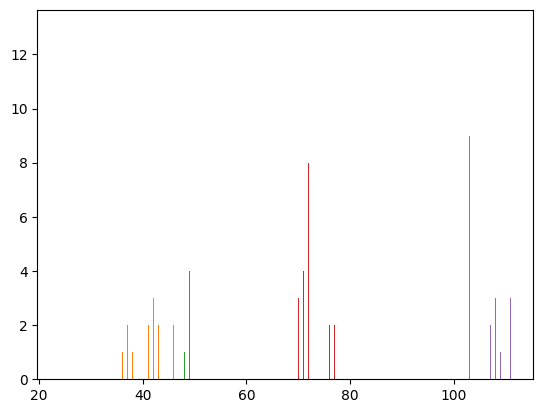

In [9]:
import json
import networkx as nx
from gw_maxcut import gw_max_cut

num_instances = 5
num_samples = 3
layers = [2, 4, 6, 8]

gw_mean_cuts = []
qemc_mean_best_cuts = []

for graph_index in range(num_instances):
    graph_path = f"{root}graph_G_{graph_index}/"
    
    graph = nx.read_graphml(f"{graph_path}graph.graphml")
    num_nodes = graph.number_of_nodes()
    num_edges = graph.number_of_edges()
    print(f"GRAPH {graph_index} - |V| = {num_nodes}, |E| = {num_edges}:")
    
    gw_res = gw_max_cut(graph)
    print("GW(MEAN, MAX) = ", gw_res)
    gw_mean_cuts.append(gw_res[0])
#     print("BRUTE FORCE = ", brute_force_max_cut(graph))
    
    best_qemc_mean_cut = 0
    for num_layers in layers:
        path = f"{graph_path}backend_statevector_simulator/blue_nodes_None/num_layers_{num_layers}/"
        
        with open(f"{path}shots_None/best_data.json", "r") as f:
            best_data = json.load(f)
            
        best_cut = best_data["conclusion"]["best_cut_score"]
        
        mean_best_cuts = 0
        for sample_id in range(num_samples):
            mean_best_cuts += best_data[f"sample_{sample_id}"]["best_score"]
        mean_best_cuts /= num_samples
        
        if mean_best_cuts > best_qemc_mean_cut:
            best_qemc_mean_cut = mean_best_cuts
        
        print(f"MEAN BEST CUTS FOR NUM LAYERS {num_layers} = {mean_best_cuts}")
        print()
    
    qemc_mean_best_cuts.append(best_qemc_mean_cut)
        
    print("======")
    
gw_mean_cuts = np.array(gw_mean_cuts)
qemc_mean_best_cuts = np.array(qemc_mean_best_cuts)

In [10]:
qemc_mean_best_cuts

array([ 26.33333333,  43.66666667,  50.66666667,  74.33333333,
       106.66666667])

In [11]:
opt_cuts = np.array([27, 46, 54, 77, 112])
opt_cuts

array([ 27,  46,  54,  77, 112])

In [12]:
gw_mean_cuts

array([ 26.1       ,  42.36666667,  51.6       ,  72.96666667,
       105.66666667])

--------------

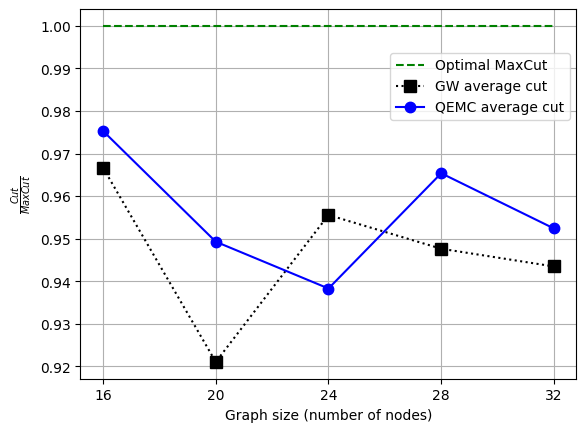

In [13]:
import matplotlib.pyplot as plt

graph_sizes = np.array(
    [
        [16, 20, 24, 28, 32],
        [34, 63, 74, 107, 159]
    ]
)
opt_cuts_ratios = np.ones(num_instances)
gw_mean_cuts_ratios = gw_mean_cuts / opt_cuts
qemc_mean_best_cuts_ratios = qemc_mean_best_cuts / opt_cuts

plt.plot(graph_sizes[0], opt_cuts_ratios, label="Optimal MaxCut", linestyle="--", color="green")
plt.plot(
    graph_sizes[0],
    gw_mean_cuts_ratios,
    label="GW average cut",
    color="black",
    marker="s",
    linestyle=":",
    markersize=8
)
plt.plot(
    graph_sizes[0],
    qemc_mean_best_cuts_ratios,
    label="QEMC average cut",
    color="blue",
    marker=".",
    markersize=15
)

plt.xlabel("Graph size (number of nodes)")
plt.ylabel("$\\frac{Cut}{MaxCut}$")
plt.legend(loc="upper right", bbox_to_anchor=(1, 0.9))

plt.xticks(ticks=graph_sizes[0])

plt.grid()
plt.show()